In [114]:
######### Heart Diseases Data - Mid Project #########
# Importing relevent packages and libs
from IPython.display import display
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading data to dataframe
df = pd.read_csv("heart_disease.csv")
#display(df)


In [123]:

# Data Observation and Verification
print("the size of data is:\n", "***************", df.shape, "***************" )
print(df.info())
print("statistics summary:\n","***************\n", df.describe(), "***************")
print("unique values:\n","***************\n", df.nunique(),"***************")

the size of data is:
 *************** (9952, 14) ***************
<class 'pandas.core.frame.DataFrame'>
Index: 9952 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Age                           9952 non-null   int64   
 1   Gender                        9952 non-null   object  
 2   Blood Pressure                9952 non-null   int64   
 3   Exercise Habits               9952 non-null   object  
 4   Smoking                       9952 non-null   object  
 5   Family Heart Disease          9952 non-null   object  
 6   BMI                           9952 non-null   float64 
 7   Stress Level                  9952 non-null   object  
 8   Sleep Hours                   9952 non-null   float64 
 9   Sugar Consumption             9952 non-null   object  
 10  Fasting Blood Sugar           9952 non-null   int64   
 11  Heart Disease Status          9952 non-null   ob

In [116]:

# Data Cleaning 

# Keeping relevant columns
relevant_cols = ["Age", "Gender","Blood Pressure", "Exercise Habits", "Smoking", "Family Heart Disease", "BMI" ,"Stress Level", "Sleep Hours", "Sugar Consumption", "Fasting Blood Sugar" ,"Heart Disease Status"]
df = df[relevant_cols]
print(df.head())

# Checking for duplicates 
print(f"Duplicates Check: {df.duplicated().sum()}") # No Suplicates, so i don"t need to use "drop_duplicates"

# Removing rows with no Age value or Gender value
df = df.dropna(subset=["Gender", "Age"])

# Filling numerical colums with median value 
df["Blood Pressure"] = df["Blood Pressure"].fillna(df["Blood Pressure"].median())
df["BMI"] = df["BMI"].fillna(df["BMI"].median())
df["Sleep Hours"] = df["Sleep Hours"].fillna(df["Sleep Hours"].median())
df["Fasting Blood Sugar"] = df["Fasting Blood Sugar"].fillna(df["Fasting Blood Sugar"].median())

# Filling object columns with the most frequent values
df["Exercise Habits"] = df["Exercise Habits"].fillna("Unknown")
df["Smoking"] = df["Smoking"].fillna("Unknown")
df["Family Heart Disease"] = df["Family Heart Disease"].fillna("Unknown")
df["Stress Level"] = df["Stress Level"].fillna("Unknown")
df["Sugar Consumption"] = df["Sugar Consumption"].fillna("Unknown")

# Checking for nulls after filling na
#print(df.isnull().sum())

# data types changes
df["Age"]=df["Age"].astype("int")
df["Blood Pressure"]=df["Blood Pressure"].astype("int")
df["Fasting Blood Sugar"]=df["Fasting Blood Sugar"].astype("int")

# Showing head of data after ETL
print(df.head())



    Age  Gender  Blood Pressure Exercise Habits Smoking Family Heart Disease  \
0  56.0    Male           153.0            High     Yes                  Yes   
1  69.0  Female           146.0            High      No                  Yes   
2  46.0    Male           126.0             Low      No                   No   
3  32.0  Female           122.0            High     Yes                  Yes   
4  60.0    Male           166.0             Low     Yes                  Yes   

         BMI Stress Level  Sleep Hours Sugar Consumption  Fasting Blood Sugar  \
0  24.991591       Medium     7.633228            Medium                  NaN   
1  25.221799         High     8.744034            Medium                157.0   
2  29.855447          Low     4.440440               Low                 92.0   
3  24.130477         High     5.249405              High                 94.0   
4  20.486289         High     7.030971              High                154.0   

  Heart Disease Status  
0      

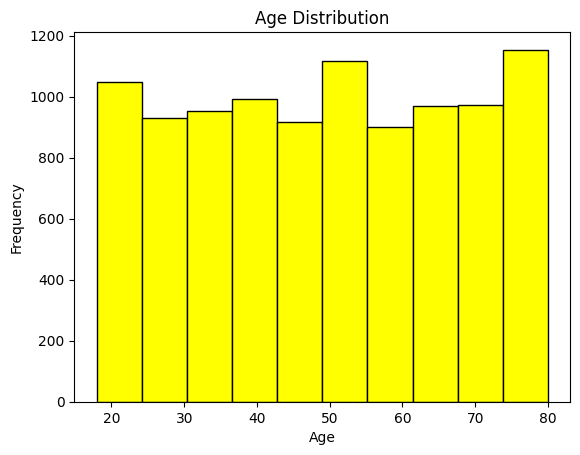

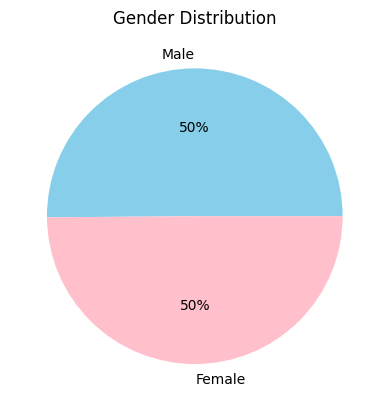

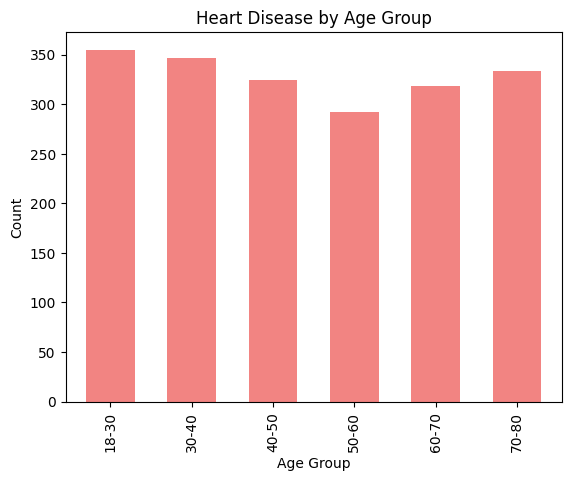

In [125]:
# Plots
# Histogram of age for all data
plt.hist(df["Age"], bins=10, color="yellow", edgecolor="black")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# Pie Chart of gender for all data
gender_counts = df["Gender"].value_counts()  # counting by gender
plt.pie(gender_counts, labels=gender_counts.index, autopct="%1.f%%",colors=["skyblue","pink"])
plt.title("Gender Distribution")
plt.show()

# Bar Chart plot by age groups for heart diseas status = 'yes'
# Define age groups (bins)
age_group = [18, 30, 40, 50, 60, 70, 80]  # Age groups for bin
age_label = ["18-30", "30-40", "40-50", "50-60", "60-70", "70-80"]  # Labels for groups

# Group the Age column into age ranges
df["Age Group"] = pd.cut(df["Age"], bins=age_group, labels=age_label, right=False)

# Filter the data to only people with heart disease 
df_heart_disease = df[df["Heart Disease Status"] == "Yes"]

# Count the occurrences of Heart Disease by Age Category
age_group_heart_disease_count = df_heart_disease["Age Group"].value_counts().sort_index()

# Plotting - Heart Disease by Age Group
age_group_heart_disease_count.plot(kind="bar", color="#f28482", width=0.6)
plt.title("Heart Disease by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.show()




Please choose a column to plot with Heart Disease Status:
For 'Smoking' enter 1
For 'Family Heart Disease' enter 2
You selected: 1


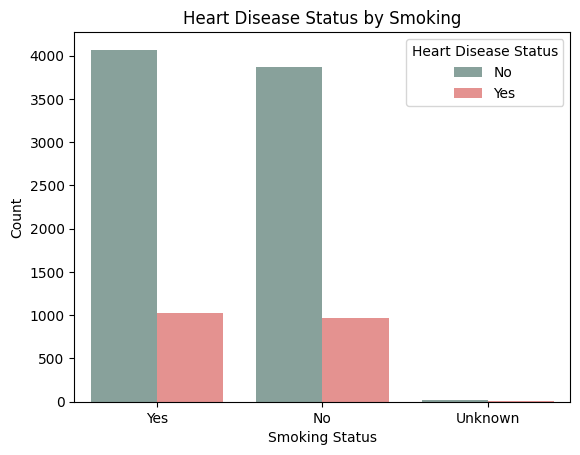

In [121]:
# Interactive Plot 1 - showing the relationship between Heart Disease Status and Smoking/Family Heart Disease by user selection
print("Please choose a column to plot with Heart Disease Status:\nFor 'Smoking' enter 1\nFor 'Family Heart Disease' enter 2")

# Inserting exception for invalid value
try:
    x = int(input())
    print(f"You selected: {x}") #showing the user his choice

    def boolplot(int):
        if int==1:
            sns.countplot(x="Smoking", hue="Heart Disease Status", data=df, palette={"Yes": "#f28482", "No": "#84a59d"})
            plt.title("Heart Disease Status by Smoking")
            plt.xlabel("Smoking Status")
            plt.ylabel("Count")
            plt.show()
        elif int==2:
            sns.countplot(x="Family Heart Disease", hue="Heart Disease Status", data=df, palette={"Yes": "#f28482", "No": "#84a59d"})
            plt.title("Heart Disease Status by Family Heart Disease")
            plt.xlabel("Family Heart Disease Status")
            plt.ylabel("Count")
            plt.show()
        else:
            print("Incorrect input! Please enter a number from the given options - 1 or 2.") #a messeage for incorrect input

    boolplot(x)

except ValueError:
    print("Invalid input! Please enter a number from the given options - 1 or 2")


Please choose a column to plot with Heart Disease Status:
For 'Exercise Habits' enter 1
For 'Stress Level' enter 2
For 'Sugar Consumption' enter 3
You selected: 1


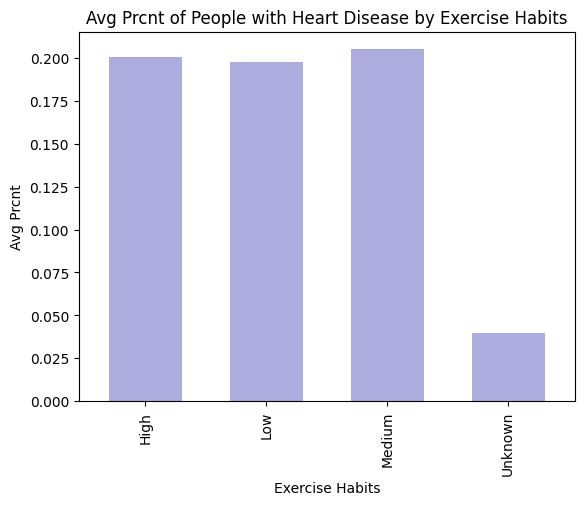

Exercise Habits
High       20.023838
Low        19.742094
Medium     20.488835
Unknown     4.000000
Name: Heart Disease Status Numeric, dtype: float64


In [122]:
# Plotting Avg prcnt of heart disease with selected column with ranges (low,high,medium...)
#  Filter the data to only people with heart disease 
df_heart_disease = df[df["Heart Disease Status"] == "Yes"]

# Heart disease status to numeric
df["Heart Disease Status Numeric"] = df["Heart Disease Status"] == "Yes"

# Instructions for the user
print("Please choose a column to plot with Heart Disease Status:\nFor 'Exercise Habits' enter 1\nFor 'Stress Level' enter 2\nFor 'Sugar Consumption' enter 3")

# Inserting exception for invalid value
try:
    x = int(input())
    print(f"You selected: {x}") #showing the user his choice

    def avgprcnt(x):
        col_list = ["Exercise Habits", "Stress Level", "Sugar Consumption" ]
        # Group by selected column and mean calculation for heart disease
        heart_disease_avg = df.groupby(col_list[x-1])["Heart Disease Status Numeric"].mean()

        # Plotting the average percentage of people with heart disease by selected column
        heart_disease_avg.plot(kind="bar", color="#ACACDE", width=0.6)
        plt.title(f"Avg Prcnt of People with Heart Disease by {col_list[x-1]}")
        plt.xlabel(col_list[x-1])
        plt.ylabel("Avg Prcnt")
        plt.show()

        # Display the average percentage after multiple in 100 (percantage)
        heart_disease_avg_prcnt = heart_disease_avg * 100
        print(heart_disease_avg_prcnt)

    avgprcnt(x)

except ValueError:
    print("Invalid input! Please enter a number from the given options - 1, 2, 3")

In [128]:
# Output the result of the ETL into json file.
df.to_json('heart_disease_data.json', orient='records', lines=True)